<a href="https://www.kaggle.com/code/rafaeldsn/titanic-ml-competition?scriptVersionId=125939537" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1>Titanic Competition - Kaggle</h1>

In [1]:
# Imports
import pandas as pd
import numpy as np
from pandasql import sqldf
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
from sklearn import preprocessing

In [2]:
test = pd.read_csv(r'/kaggle/input/titanic/test.csv')
train = pd.read_csv(r'/kaggle/input/titanic/train.csv')

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Percentage of NaN values in each column
train.isnull().sum()/len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

# Feature Selection
<p style="fontsize:14px">Some of the deleted variables can have valuable information on the model like the Cabin and Embarked, but they will be disconsidered aiming the simplification of the model</p>

In [6]:
df_train = train.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis=1)

# dataframe for verification
df_test = test.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis=1)

df_train.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,NaN,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


# Values Imputation

<p style="fontsize:14px">A new dateset without the na values will be used in order to analyze the imputation of values for the Age column</p>

In [7]:
df_imputation = df_train.dropna()

<p style="fontsize:14px">The variables analysed for the imputation will be Parch and Sibsp</p>

Text(0.5, 1.0, 'Histogram of Parch Column')

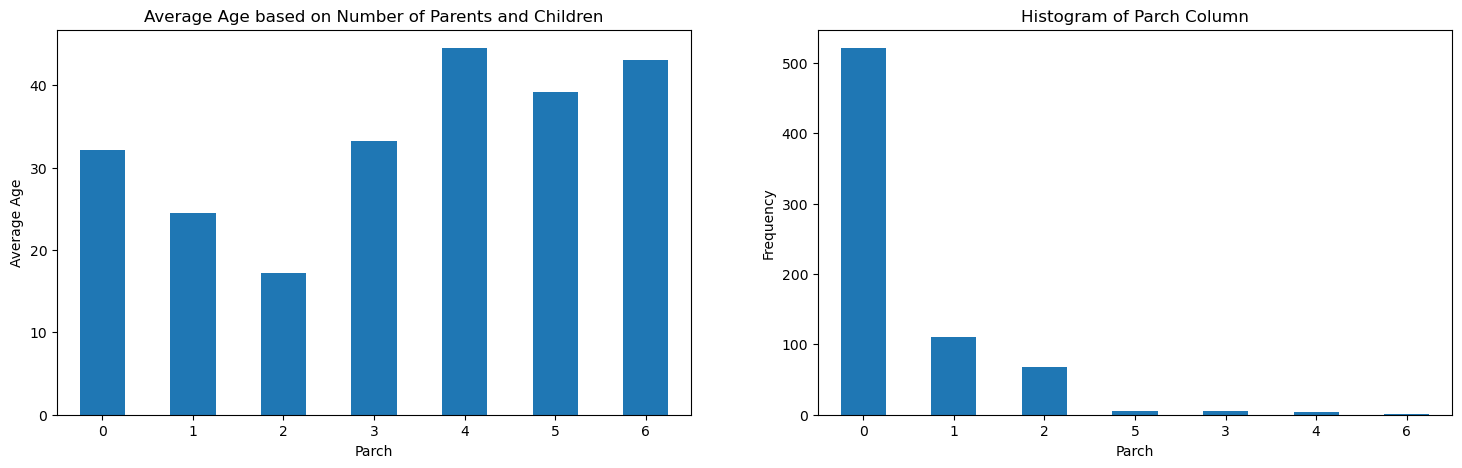

In [8]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
df_imputation.groupby('Parch')['Age'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel("Average Age")
plt.title("Average Age based on Number of Parents and Children")

plt.subplot(1,2,2)
df_imputation['Parch'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel("Parch")
plt.ylabel("Frequency")
plt.title("Histogram of Parch Column")

Text(0.5, 1.0, 'Histogram of SibSp Column')

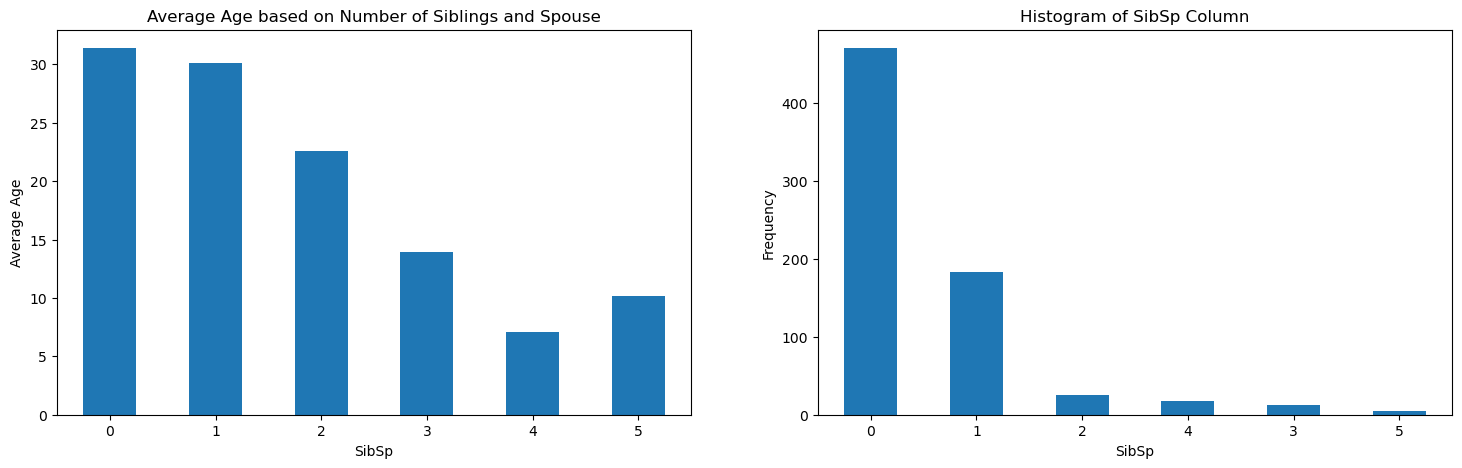

In [9]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
df_imputation.groupby('SibSp')['Age'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel("Average Age")
plt.title("Average Age based on Number of Siblings and Spouse")

plt.subplot(1,2,2)
df_imputation['SibSp'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel("SibSp")
plt.ylabel("Frequency")
plt.title("Histogram of SibSp Column")



<p style="fontsize:18px">As we can see there is an inverse correlation between SibSp and Age</p>


In [10]:
stats.pearsonr(df_imputation['Age'], df_imputation['SibSp'])

(-0.30824675892365666, 3.5090251937827586e-17)

In [11]:
# Index of the rows with NaN for later verification
invalid_rows = [index for index, row in df_train.iterrows() if row.isnull().any()]

<p style="fontsize:14px">The imputation will be made considering the average age for each SibSp column.</p>

In [12]:
df_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


## Dataframe with average Age for each SibSp

In [13]:
# Dataframe with average Age for each SibSp
age_SibSp = df_imputation.groupby('SibSp')['Age'].mean()
age_SibSp_df = age_SibSp.to_frame().reset_index()
age_SibSp_df = age_SibSp_df.round()
age_SibSp_df

,SibSp,Age
0,0,31.0
1,1,30.0
2,2,23.0
3,3,14.0
4,4,7.0
5,5,10.0


## Alocating the Values

In [14]:
# Iterating through rows
for i in range(len(df_train)):
    
    # Checking if the Age is NaN
    if (math.isnan(df_train['Age'][i])):
        
        for j in range(len(age_SibSp_df)):
            
            if df_train['SibSp'][i] == age_SibSp_df['SibSp'][j]:
                df_train.loc[i,'Age'] = age_SibSp_df['Age'][j]
            
            elif df_train['SibSp'][i] > age_SibSp_df['SibSp'][len(age_SibSp_df)-1]:    
                df_train.loc[i,'Age'] = age_SibSp_df['Age'][len(age_SibSp_df)-1]
                
                
# Alocating in the test dataframe -> df_test
# Iterating through rows
for i in range(len(df_test)):
    
    # Checking if the Age is NaN
    if (math.isnan(df_test['Age'][i])):
        
        for j in range(len(age_SibSp_df)):
            
            if df_test['SibSp'][i] == age_SibSp_df['SibSp'][j]:
                df_test.loc[i,'Age'] = age_SibSp_df['Age'][j]
            
            elif df_test['SibSp'][i] > age_SibSp_df['SibSp'][len(age_SibSp_df)-1]:    
                df_test.loc[i,'Age'] = age_SibSp_df['Age'][len(age_SibSp_df)-1]
                

In [15]:
# Rows with imputed values
df_train.iloc[invalid_rows].head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,0,3,male,31.0,0,0,8.4583
17,1,2,male,31.0,0,0,13.0000
19,1,3,female,31.0,0,0,7.2250
26,0,3,male,31.0,0,0,7.2250
28,1,3,female,31.0,0,0,7.8792
29,0,3,male,31.0,0,0,7.8958
31,1,1,female,30.0,1,0,146.5208
32,1,3,female,31.0,0,0,7.7500
36,1,3,male,31.0,0,0,7.2292
42,0,3,male,31.0,0,0,7.8958


# Exploratory Analysis 

In [16]:
### INFO E DESCRIBE
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    417 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


In [18]:
# There is one column in the test dataframe with a null value, so this column will be alocated with the fare average
avg_fare = df_train['Fare'].mean()
df_test["Fare"].fillna(avg_fare, inplace = True)

In [19]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.660123,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.176688,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


(0.0, 600.0)

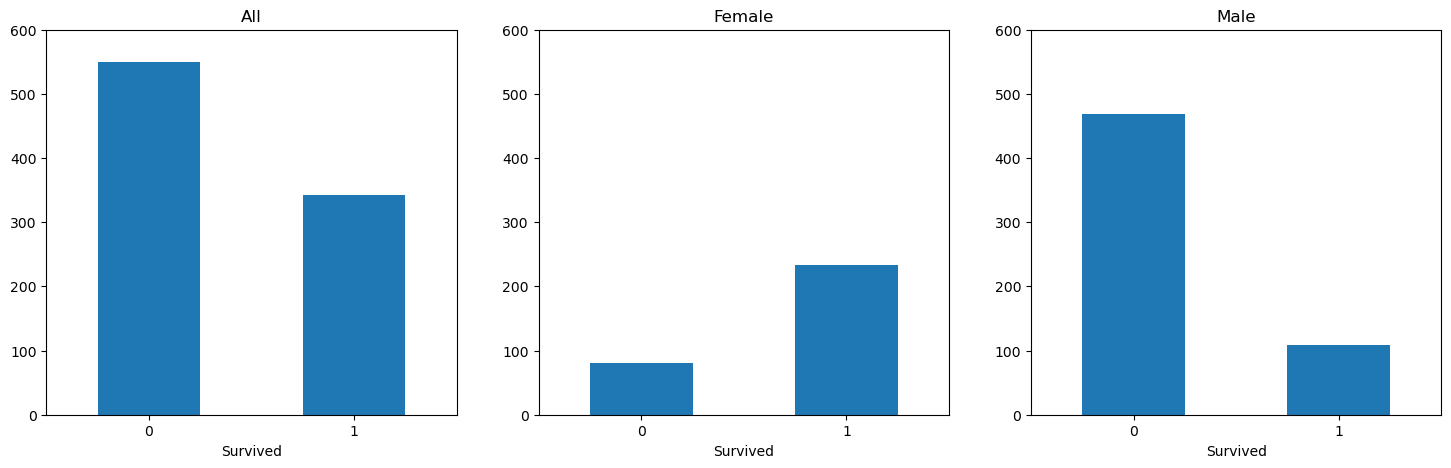

In [21]:
# SURVIVED ALL / MALE / FEMALE 

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
df_train.groupby('Survived')['Pclass'].count().plot(kind='bar')
plt.xticks(rotation=0)
plt.title("All")
plt.ylim(0,600)

plt.subplot(1,3,2)
df_train[df_train.Sex == 'female'].groupby('Survived')['Pclass'].count().plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Female")
plt.ylim(0,600)

plt.subplot(1,3,3)
df_train[df_train.Sex == 'male'].groupby('Survived')['Pclass'].count().plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Male")
plt.ylim(0,600)


### **Survivals in Percentage**

In [22]:
survived_percentage = ((df_train['Survived'].value_counts()/df_train['Survived'].count())*100).round(1)
print("" + str(survived_percentage[1]) + "% people survived.")

38.4% people survived.


In [23]:
# Percentage of man and woman on the boat
sex_percentage = ((df_train['Sex'].value_counts()/df_train['Sex'].count())*100).round(1)
print("The dataset have " + str(sex_percentage[0]) + "% of men and " + str(sex_percentage[1]) + "% of women.")


The dataset have 64.8% of men and 35.2% of women.


In [24]:
# Percentage of man that survived
df_male = df_train[df_train.Sex == 'male']
survived_men = ((df_male['Survived'].value_counts()/df_male['Survived'].count())*100).round(1).sort_index()
print("" + str(survived_men[1]) + "% of men survived ")

18.9% of men survived 


In [25]:
# Percentage of woman that survived
df_fem = df_train[df_train.Sex == 'female']
survived_women = ((df_fem['Survived'].value_counts()/df_fem['Survived'].count())*100).round(1).sort_index()
print("" + str(survived_women[1]) + "% of women survived ")

74.2% of women survived 


<AxesSubplot:title={'center':'Percentage of people in each class'}>

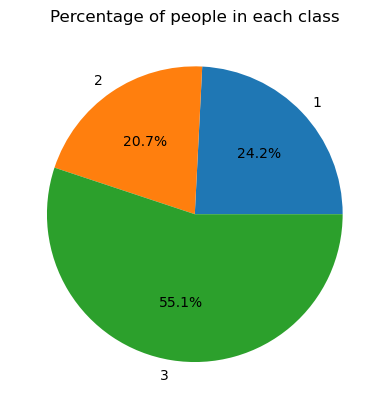

In [26]:
# SURVIVED X PASSENGERS CLASS

# Percentage of people in each Class
((df_train['Pclass'].value_counts()/df_train['Pclass'].count())*100).round(1).sort_index().plot \
                                          .pie(title = 'Percentage of people in each class', autopct='%1.1f%%', label = "")

In [27]:
# Number of people Survived in each Class
df_Pclass_survived = sqldf("SELECT Survived, Pclass, COUNT(Survived) AS n FROM df_train GROUP BY Pclass, Survived ")
df_Pclass_survived

,Survived,Pclass,n
0,0,1,80
1,1,1,136
2,0,2,97
3,1,2,87
4,0,3,372
5,1,3,119


(0.0, 400.0)

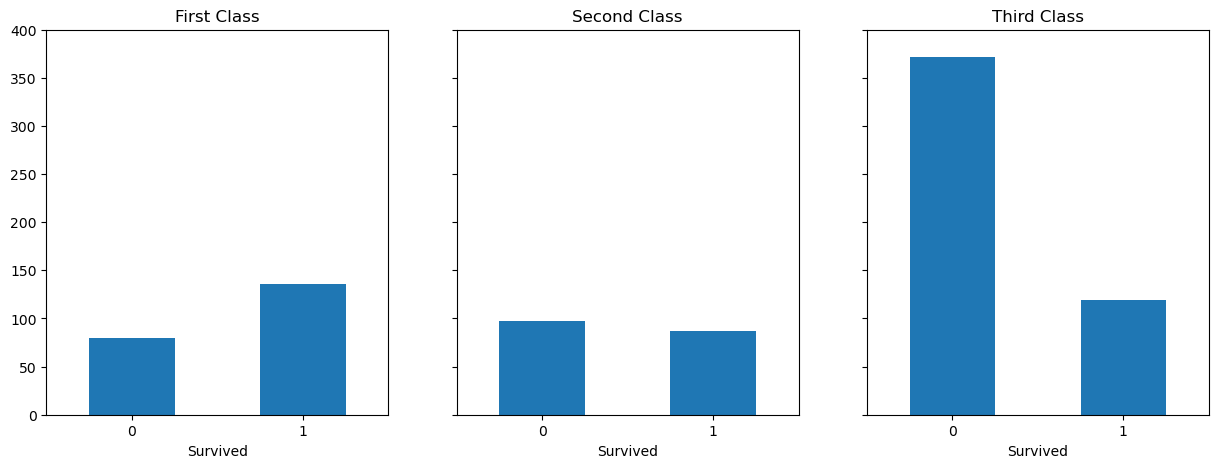

In [28]:

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15,5))

df_Pclass_survived.loc[lambda df_train: df_train['Pclass'] == 1].plot(x='Survived', y='n', kind='bar',
                                                          legend = False, ax=axes[0], title='First Class', rot=0)


df_Pclass_survived.loc[lambda df_train: df_train['Pclass'] == 2].plot(x='Survived', y='n', kind='bar',
                                                          legend = False, ax=axes[1], title='Second Class', rot=0)


df_Pclass_survived.loc[lambda df_train: df_train['Pclass'] == 3].plot(x='Survived', y='n', kind='bar',
                                                          legend = False, ax=axes[2], title='Third Class', rot=0)

plt.ylim(0,400)


<AxesSubplot:title={'center':'Percentage of Survived Per Class'}, xlabel='Class', ylabel='Percentage'>

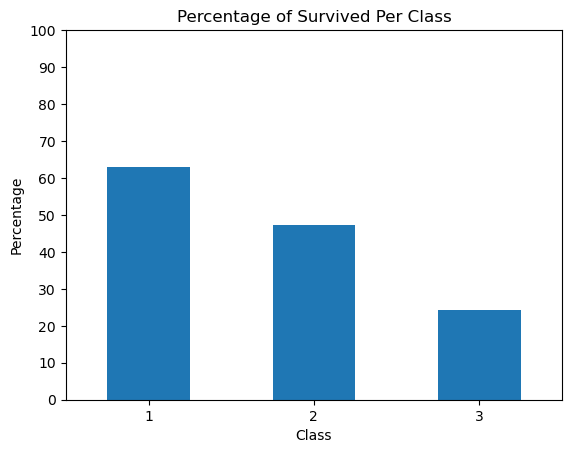

In [29]:
# Percentage of survived per age
df_Pclass_survived['Percentage_per_class'] = df_Pclass_survived.apply(
    lambda row: row.n/(df_Pclass_survived.loc[df_Pclass_survived['Pclass'] == row.Pclass, 'n'].sum()), axis =1)
df_Pclass_survived['Percentage_per_class'] = df_Pclass_survived['Percentage_per_class'].apply(lambda x: round(x*100,2))

df_Pclass_survived[df_Pclass_survived['Survived']==1].plot(kind='bar', x='Pclass', y='Percentage_per_class',rot=0,
                                                           xlabel = 'Class', ylabel='Percentage',yticks=range(0,101,10), 
                                                           legend=None, title='Percentage of Survived Per Class', ylim=(0,100))


Text(0.5, 0, 'Age')

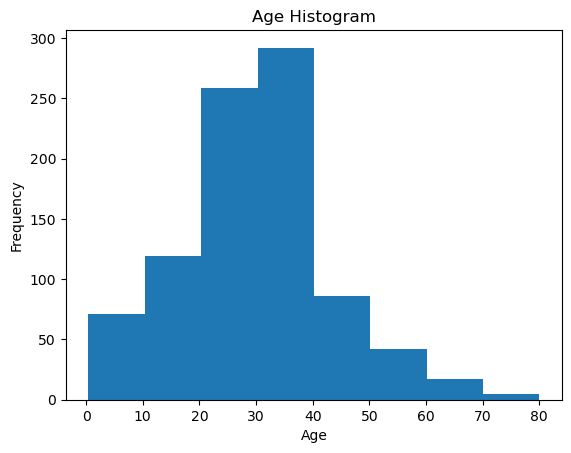

In [30]:
# SURVIVED X AGE
df_train['Age'].plot(kind = 'hist', bins=8, title='Age Histogram')
plt.xlabel('Age')


In [31]:
df_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [32]:
# Percentage of people survived SIBSP AND PARCH

# Number of people Survived in each SibSp
df_SibSp_survived = sqldf("SELECT Survived, SibSp, COUNT(Survived) AS n FROM df_train GROUP BY SibSp, Survived")
df_SibSp_survived

,Survived,SibSp,n
0,0,0,398
1,1,0,210
2,0,1,97
3,1,1,112
4,0,2,15
5,1,2,13
6,0,3,12
7,1,3,4
8,0,4,15
9,1,4,3


### There were no survivors for SibSp equals 5 and 8

<AxesSubplot:title={'center':'Percentage of Survived Per each number of SibSp'}, xlabel='SibSp', ylabel='Percentage of Survived'>

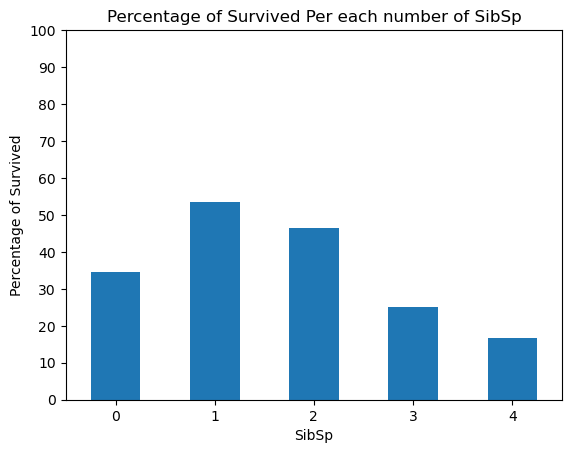

In [33]:
df_SibSp_survived['Percentage_per_SibSp'] = df_SibSp_survived.apply(
    lambda row: row.n/(df_SibSp_survived.loc[df_SibSp_survived['SibSp'] == row.SibSp, 'n'].sum()), axis =1)
df_SibSp_survived['Percentage_per_SibSp'] = df_SibSp_survived['Percentage_per_SibSp'].apply(lambda x: round(x*100,2))

df_SibSp_survived[df_SibSp_survived['Survived']==1].plot(kind='bar', x='SibSp', y='Percentage_per_SibSp',rot=0,
                                                           xlabel = 'SibSp', ylabel='Percentage of Survived',
                                                           yticks=range(0,101,10), 
                                                           legend=None, title='Percentage of Survived Per each number of SibSp',
                                                           ylim=(0,100))

In [34]:
# Number of people Survived in each ParCh
df_Parch_survived = sqldf("SELECT Survived, Parch, COUNT(Survived) AS n FROM df_train GROUP BY Parch, Survived")
df_Parch_survived

,Survived,Parch,n
0,0,0,445
1,1,0,233
2,0,1,53
3,1,1,65
4,0,2,40
5,1,2,40
6,0,3,2
7,1,3,3
8,0,4,4
9,0,5,4


### There are no survivors when the number of Parch is 4 and 6 

<AxesSubplot:title={'center':'Percentage of Survived Per each number of Parch'}, xlabel='Parch', ylabel='Percentage of Survived'>

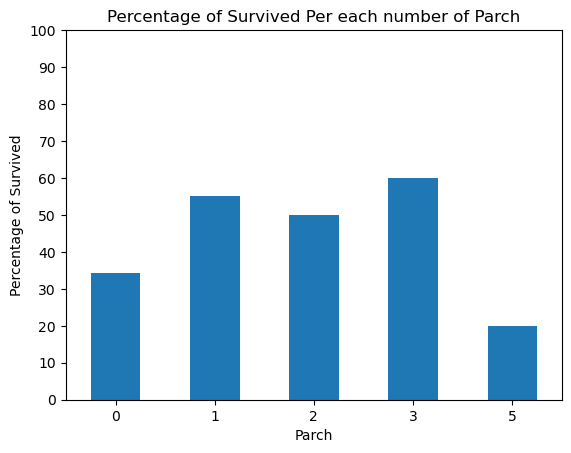

In [35]:
df_Parch_survived['Percentage_per_Parch'] = df_Parch_survived.apply(
    lambda row: row.n/(df_Parch_survived.loc[df_Parch_survived['Parch'] == row.Parch, 'n'].sum()), axis =1)
df_Parch_survived['Percentage_per_Parch'] = df_Parch_survived['Percentage_per_Parch'].apply(lambda x: round(x*100,2))

df_Parch_survived[df_Parch_survived['Survived']==1].plot(kind='bar', x='Parch', y='Percentage_per_Parch',rot=0,
                                                           xlabel = 'Parch', ylabel='Percentage of Survived',
                                                           yticks=range(0,101,10), 
                                                           legend=None, title='Percentage of Survived Per each number of Parch',
                                                           ylim=(0,100))


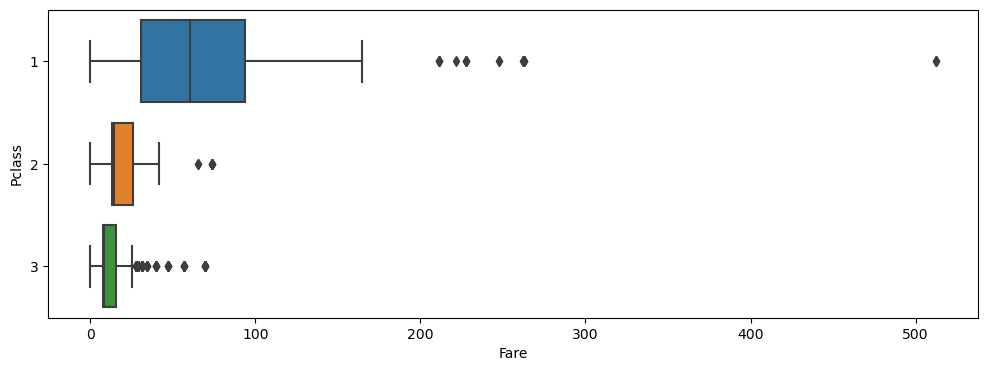

In [36]:
# FARE AND CLASS (BOXPLOTS)
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(data=df_train, x='Fare', y='Pclass', orient='h')
plt.show()

### Label Encoding the Sex Variable

In [37]:
label_encoder = preprocessing.LabelEncoder()

df_train['Sex']= label_encoder.fit_transform(df_train['Sex'])
df_test['Sex']= label_encoder.fit_transform(df_test['Sex'])

df_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


### There is a decent correlation between the Passanger Class and Price, if this correlation is too high it can cause multicolinearity problems

<AxesSubplot:>

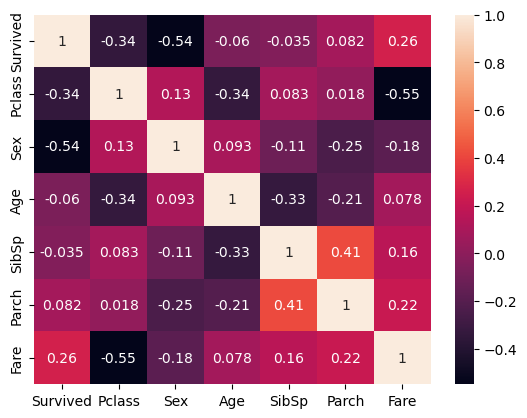

In [38]:
# CORRELATION PLOT
sns.heatmap(df_train.corr(), annot = True)

### The Correlation of 0.55 is not considered very high so both variables will remain in the model 

# Building the Machine Learning Model

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report, confusion_matrix

X = df_train.drop("Survived", axis=1)
y = df_train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [40]:
model = LogisticRegression(random_state=5, max_iter=1000).fit(X_train, y_train)

In [41]:
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.7892376681614349

### In this prediction we had 78.9% of accuracy, so it can be considered a good convergence for this model

# Submitting the results for the challange

In [42]:
submission = model.predict(df_test)

In [43]:
df_submission = pd.DataFrame({"PassengerId": test['PassengerId'].values,
                              "Survived": submission,
                             })

In [44]:
# df_submission.to_csv("submission_titanic.csv", index=False)